In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stripes(df, x_col, y_col, title="Stripes Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    plt.figure(figsize=(12, 6))
    sns.stripplot(x=x_col, y=y_col, data=df, jitter=True, alpha=0.7)
    plt.title(title)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

def plot_smoothed_line(df):
    # Group by release year and genre, summing the total streams
    grouped = df.groupby(['Release Year', 'Genre'])['Total Streams (Millions)'].sum().unstack(fill_value=0)

    # Sort by year for chronological plotting
    grouped = grouped.sort_index()

    # Prepare data for stackplot
    years = grouped.index
    genres = grouped.columns
    streams_by_genre = grouped.T.values  # Transpose so genres are stacked

    # Create the streamgraph
    plt.figure(figsize=(10, 6))
    plt.stackplot(years, streams_by_genre, labels=genres, alpha=0.85)

    # Chart decorations
    plt.title('Genre Popularity Over Time (Total Streams in Millions)', fontsize=16)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Total Streams (Millions)', fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("/content/gdrive/My Drive/Spotify_2024_Global_Streaming_Data.csv")
# Quick preview
print(df.head())
print(df.info())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2019                         23.10                   3695.53   
1          2022                         60.60                   2828.16   
2          2023                         42.84                   1425.46   
3          2018                         73.24                   2704.33   
4          2023                          7.89                   3323.25  

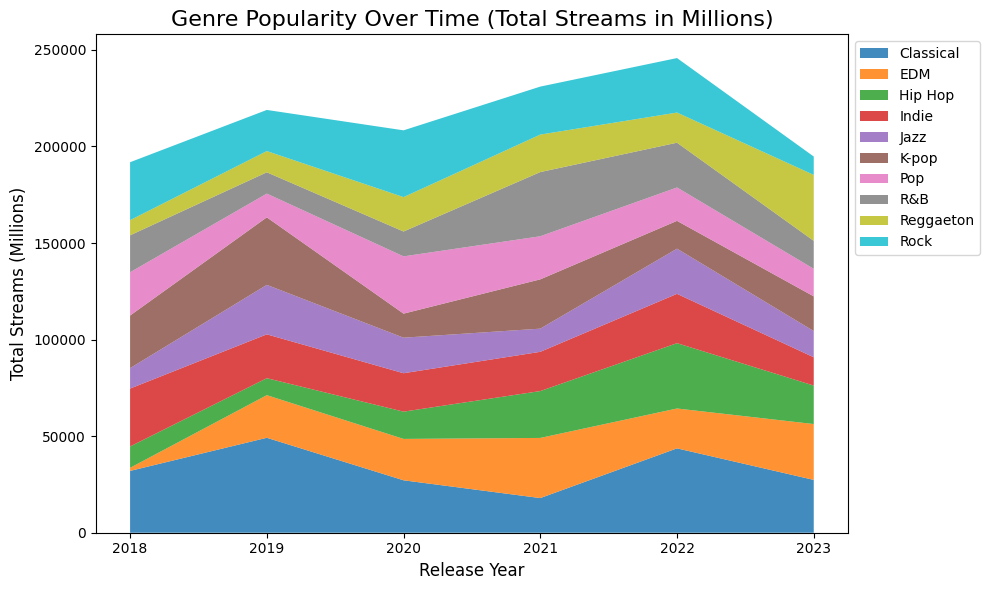

In [6]:
plot_smoothed_line(df)